In [1]:
%matplotlib inline

In [2]:
import itertools 
from pathlib import Path

import numpy as np

import matplotlib.pyplot as plt
import matplotlib.tri as mtri
import matplotlib.patches as mpatches
from mpl_toolkits.mplot3d import proj3d
import mpl_toolkits.mplot3d.art3d as art3d

import highlight_text as ht

import intro_plots as ip
import papercolors as pc
from papercolors import colordict as pcd

paper_path = Path('../figures/')


In [3]:
# https://github.com/matplotlib/matplotlib/issues/21688#issuecomment-974912574

class FancyArrowPatch3D(mpatches.FancyArrowPatch):
    def __init__(self, posA, posB, *args, **kwargs):
        mpatches.FancyArrowPatch.__init__(self, (0, 0), (0, 0), *args, **kwargs)
        self._verts3d = list(zip(posA, posB))
        
    def do_3d_projection(self, renderer=None):
        xs3d,  ys3d , zs3d, = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
        

In [4]:
def make_mobius(ax):
    # Make a mesh in the space of parameterisation variables u and v
    u = np.linspace(0, 2.0 * np.pi, endpoint=True, num=50)
    v = np.linspace(-0.5, 0.5, endpoint=True, num=10)
    u, v = np.meshgrid(u, v)
    u, v = u.flatten(), v.flatten()

    # This is the Mobius mapping, taking a u, v pair and returning an x, y, z
    # triple
    R = 1
    x = (1 + 0.5 * v * np.cos(u / 2.0)) * np.cos(u)
    y = (1 + 0.5 * v * np.cos(u / 2.0)) * np.sin(u)
    z = 0.5 * v * np.sin(u / 2.0)

    # Triangulate parameter space to determine the triangles
    tri = mtri.Triangulation(u, v)

    # Plot the surface.  The triangles in parameter space determine which x, y, z
    # points are connected by an edge.
    ax.plot_trisurf(x, y, z, triangles=tri.triangles, color=pcd['total'], edgecolor=None, alpha=.25)
    ax.text3D(0,-.65 , .5, "E", color=pcd['total'])

    # z is up
    # x is right
    # y is left
    zb = -1

    f1 ={'ind':15, 'zoff':.5, 'fiber':r"$F_{1} = [-1, 1]$", 'section':r"$sin(k_{1})$"}
    f2 ={'ind':43, 'zoff':.35, 'fiber':r"$F_{2} = [1, -1]$", 'section':r"$sin(k_{-1})$"}


    for fd in [f1, f2]:
        fx = x[fd['ind']]
        fy = y[fd['ind']]
        fz = z[fd['ind']]
        ax.plot([fx, fx], [fy, fy], [fz, fz+fd['zoff']], color=pcd['fiber'])
        ax.text3D(fx, fy+.2, fz+fd['zoff'], fd['fiber'], va='bottom', ha='center', color=pcd['fiber'])

        fp = FancyArrowPatch3D((fx, fy, fz), (fx, fy, zb+.05),  arrowstyle='->', 
                                        mutation_scale=20, color='gray')
        ax.add_artist(fp)


        ty =  fz + .25         
        ax.scatter(fx, fy, ty, color=pcd['section'])
        ft = FancyArrowPatch3D((fx, fy, zb+.1), (fx, fy, ty),  arrowstyle='->', 
                                connectionstyle='arc3,rad=.35', color=pcd['section'], 
                                mutation_scale=20)
        ax.add_patch(ft)

        mid = zb + (fz-zb)/2
        ax.text3D(fx, fy-.05, mid, r"$\pi$", color="gray", ha='right')
        ax.text3D(fx+.5, fy + .2, mid+.1, r"$sin($" + f'{fx:.2f}' + r"$)$", color=pcd['section'], ha='left')


    xo, yo = (0, 0)
    t = np.linspace(0, 2*np.pi, 500)
    ex =  np.cos(t)
    ey = np.sin(t)
    ax.plot(R*ex, R*ey, zb,  color=pcd['base'], lw=2)

    #ax.set_proj_type('ortho')
    ax.view_init(15, -20)

    ax.set_zlim(-1, .35)

    ax.axis('off')

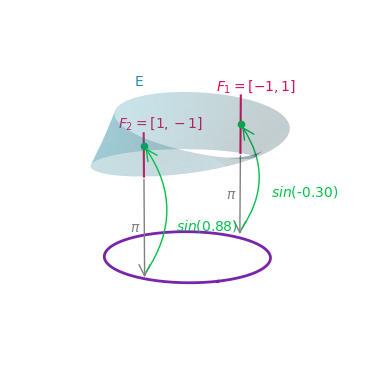

In [5]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(1, 2, 1, projection='3d')
make_mobius(ax)
fig.savefig(paper_path/"fbtau", bbox_inches='tight', dpi=200)


In [351]:
# circle base space
zb = -.3
R = .6
xo, yo = (0, 0)
N = 100

t = np.linspace(0, 2*np.pi, N)

ex =  np.cos(t)
ey = np.sin(t)

r1 = [.05, .85]
r2 = [1.25, 1.45]
ry = .45 
rh = .125
    
zoff = -.15
zm = np.linspace(-.8, .8, N//5)
zc = np.linspace(ry, ry+rh*4, N//5)
tcg, zcg = np.meshgrid(t, zc)
    
lw = 2
ly = .35

xB = xo+R*ex
yB = yo+R*ey
    
mask1 = (t>=2*np.pi/5)
mask2 = (t<=2*np.pi/5)



light_base = pc.lighten(pcd['base'], .3)
light_total = pc.lighten(pcd['total'], .3)
light_fiber = pc.lighten(pcd['fiber'], .3)

dark_colors = (pcd['total'], pcd['fiber'], pcd['base'])
light_colors = (light_total, light_fiber, light_base)

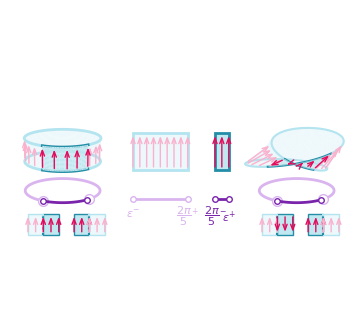

In [353]:
fig, axd = plt.subplot_mosaic([['cyl', 'local','mb']], figsize=(3.5,3), layout='constrained')

for axn in ['cyl', 'mb']:
    ss = axd[axn].get_subplotspec()
    axd[axn].remove()
    axd[axn] = fig.add_subplot(ss, projection='3d')
    axd[axn].set(xlim=(-.5,.5), ylim=(-.5,.5), zlim=(0,1), aspect='equalxy')
    axd[axn].axis('off')
    axd[axn].view_init(15, 30)

axd['local'].set( ylim=(0,1), xlim=(0, 1.5))


fake_eps = .5


for axn in ['cyl', 'mb']:
    axd[axn].plot(xB[mask1], yB[mask1],  zb,  color=light_base, lw=2, 
                  markevery=[0, -1], marker='o', mfc='white',  markersize=7)
    axd[axn].plot(xB[mask2], yB[mask2], zb, color=pcd['base'], lw=2, 
                  markevery=[0, -1], marker='o', mfc='white',  markersize=4,)

zm_off = .5
zc_off = -.1

xvals = lambda u, v: (R*(1 + .5* v * np.cos(u / 2.0)) * np.cos(u)) + xo  
yvals = lambda u, v: (R*(1 + .5* v * np.cos(u / 2.0)) * np.sin(u)) + yo 
zvals = lambda u, v: 0.5 * v * np.sin(u / 2.0)
    
    
for (mask, (tc, fc, bc)) in [(mask1, light_colors), (mask2, dark_colors)]: 
    axd['cyl'].plot_surface(xB[mask], yB[mask], np.meshgrid(t[mask], zc)[-1]+zc_off, 
                            color=pc.lighten(tc, .25), shade=False)

    u, v = np.meshgrid(t[mask], zm)
    u, v = u.flatten(), v.flatten()
    tri = mtri.Triangulation(u, v)
    
    axd['mb'].plot_trisurf(xvals(u,v), yvals(u,v), zvals(u,v) + zm_off, triangles = tri.triangles, 
                          edgecolor=None, color=pc.lighten(tc, .25), shade=False)
    
    fibers = {'mb':{'t':t[mask]}, 'cyl':{'t':t[mask]}}
    
    for i in [0,-1]:
        fibers['cyl'][i] = (xB[mask], yB[mask], np.repeat(zc[i]+zc_off, xB[mask].shape[0]))
        fibers['mb'][i] = (xvals(t[mask],zm[i]), yvals(t[mask], zm[i]), zvals(t[mask], zm[i])+zm_off)
        axd['cyl'].plot(*fibers['cyl'][i], color=tc, lw=2, zorder=3)
        axd['mb'].plot(*fibers['mb'][i], color=tc, zorder=3)
        
    
    for (axn, (tk, posA, posB)) in fibers.items():
        num =  fibers[axn][posA][0].shape[0]
        idx = np.round(np.linspace(0, num-1, num//4)).astype(int)
        for (t0, x0, y0, z0, x1, y1, z1) in np.vstack([fibers[axn][tk], fibers[axn][posA], fibers[axn][posB]]).T[idx]:
            
            color = 'none' if 0.6*np.pi<t0<1.6*np.pi else fc
            ft = FancyArrowPatch3D((x0, y0, z0), (x1, y1, z1),  
                                       arrowstyle='->,head_width=0.15', color=color, mutation_scale=10)
            axd[axn].add_patch(ft)
        

for (x0, x1), (tc, fc, bc) in [(r2,dark_colors), (r1, light_colors)]:
    rect = mpatches.Rectangle((x0, ry), height = rh, width=(x1-x0), 
                              edgecolor=tc, facecolor=pc.lighten(tc,.25), lw=lw) 
    axd['local'].add_patch(rect)
    axd['local'].plot([x0, x1], [ly, ly], lw=2, color=bc, marker='o', mfc='white',  markersize=4)

    for x in np.linspace(x0, x1, int(np.round(x1-x0,1)*10) +1):
        at = mpatches.FancyArrowPatch(posA=(x, ry), posB=(x, ry+rh),
                                        arrowstyle='->,head_width=0.15', mutation_scale=10, edgecolor=fc)
        axd['local'].add_patch(at)

fontsize=8
axd['local'].annotate(r"$\epsilon^{-}$", (r1[0], ly), (0, -7), textcoords="offset points",
                      ha='center', va='top', color=light_base, fontsize=fontsize)
axd['local'].annotate(r"${\dfrac{2\pi}{5}}^{+}$",(r1[1], ly), (0, -3.5), textcoords="offset points",
                      ha='center', va='top', color=light_base, fontsize=fontsize) 
axd['local'].annotate(r"${\dfrac{2\pi}{5}}^{-}$",(r2[0], ly), (0, -3.5), textcoords="offset points",
                      ha='center', va='top', color=pcd['base'], fontsize=fontsize) 
axd['local'].annotate(r"$\epsilon^{+}$", (r2[1], ly),(0, -7), textcoords="offset points",
                      ha='center', va='top', color=pcd['base'], fontsize=fontsize)
axd['local'].axis('off')

for axn in ['cyl', 'mb']:
    axins = axd[axn].inset_axes([.05,-.3, 1, .25])
    axins.set(xlim=(0,1), ylim=(0,1))

    width=.15
    bottom = .1
    top = .9
    for xm, color_left, color_right in [(.275, light_colors, dark_colors), (.725, dark_colors, light_colors)]:
        axins.axvline(xm, bottom, top, linestyle=':', color=pcd['total'], gapcolor=light_total)

        for off, (tc, fc, bc) in [(-width, color_left), (0, color_right)]:
            rec = mpatches.Rectangle((xm+off,bottom), width=width, height= top-bottom, 
                                 edgecolor=tc, facecolor=pc.lighten(tc, .25))
            axins.add_patch(rec)

            for xa in np.linspace(xm+off, xm+width+off, 3):
                ys, yt = (top, bottom) if (axn=='mb' and xm==.275 and off==0) else (bottom, top) 
                at = mpatches.FancyArrowPatch(posA=(xa, ys), posB=(xa, yt),
                                              arrowstyle='->,head_width=0.15', mutation_scale=10, 
                                              edgecolor=fc, zorder=3)
                axins.add_patch(at)
        axins.axis('off')

In [74]:
t

6.283185307179586

In [ ]:
xvals = lambda u, v: (R*(1 + .5* v * np.cos(u / 2.0)) * np.cos(u)) + xo
yvals = lambda u, v: (R*(1 + .5* v * np.cos(u / 2.0)) * np.sin(u)) + yo

In [ ]:
xvals(0,0)-xo

In [65]:
for (axn, (t, PosA, PosB)) in fibers.items():
    print(axn,t, PosA, PosB)

mb t 0 -1
cyl t 0 -1


In [ ]:
np.round

In [64]:
fibers.items()

dict_items([('mb', {'t': array([1.26933037, 1.33279688, 1.3962634 , 1.45972992, 1.52319644,
       1.58666296, 1.65012947, 1.71359599, 1.77706251, 1.84052903,
       1.90399555, 1.96746207, 2.03092858, 2.0943951 , 2.15786162,
       2.22132814, 2.28479466, 2.34826118, 2.41172769, 2.47519421,
       2.53866073, 2.60212725, 2.66559377, 2.72906028, 2.7925268 ,
       2.85599332, 2.91945984, 2.98292636, 3.04639288, 3.10985939,
       3.17332591, 3.23679243, 3.30025895, 3.36372547, 3.42719199,
       3.4906585 , 3.55412502, 3.61759154, 3.68105806, 3.74452458,
       3.8079911 , 3.87145761, 3.93492413, 3.99839065, 4.06185717,
       4.12532369, 4.1887902 , 4.25225672, 4.31572324, 4.37918976,
       4.44265628, 4.5061228 , 4.56958931, 4.63305583, 4.69652235,
       4.75998887, 4.82345539, 4.88692191, 4.95038842, 5.01385494,
       5.07732146, 5.14078798, 5.2042545 , 5.26772102, 5.33118753,
       5.39465405, 5.45812057, 5.52158709, 5.58505361, 5.64852012,
       5.71198664, 5.77545316, 5.8389

In [ ]:
[0]

In [ ]:
itertools.cycle

In [ ]:
 mask.nonzero()[0].sum()

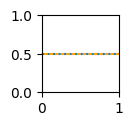

In [303]:
fig, ax = plt.subplots(figsize=(1,1))
ax.axhline(.5, linestyle=':', gapcolor='orange')

In [298]:
import matplotlib
matplotlib.__version__

'3.6.2'

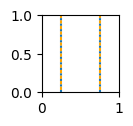

In [305]:
fig, ax = plt.subplots(figsize=(1,1))
for x in [.25, .75]:
    ax.axvline(x, 0, 1, linestyle=':', gapcolor='orange')

In [306]:
import matplotlib; print(matplotlib.__version__)

3.6.2
